## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_df= pd.merge(mouse_metadata,study_results,how="outer", on = "Mouse ID")

# Display the data table for preview
combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
#combine_df.groupby(["Mouse ID"]).count()
#total_mice = combine_df.groupby(by="Mouse ID", as_index=False).agg({.count()
#unique_df = combine_df["Mouse ID"].nunique()

mouse = combine_df["Mouse ID"].unique()
mouse_count = len(mouse)
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

multiple = combine_df.loc[combine_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
#multiple = pd.DataFrame(multiple)
multiple
#combine_df.groupby(["Mouse ID"])

#timepoint = combine_df[combine_df.duplicated(["Mouse ID"])]
#timepoint.set_index("Mouse ID", inplace=True)
#timepoint = combine_df.loc["Mouse ID","Timepoint"]
#timepoint = combine_df.loc[timepoint.duplicated(),:"Timepoint"]

#timepoint["Mouse ID","Timepoint"]

#timepoint = combine_df.groupby(["Mouse ID","Timepoint"])
#timepoint.first()

#combine_df[combine_df.duplicated(subset="Mouse ID")==True]
#timepoint


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data=combine_df.loc[combine_df.duplicated(keep=False),:]
#duplicate_mouse_data = pd.DataFrame(multiple)
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data = combine_df.drop_duplicates(keep=False)
#clean_data = clean_data.drop(duplicate_mouse_data)
clean_data = combine_df[combine_df['Mouse ID'].isin(multiple)==False]
#clean_data = combine_df.loc[combine_df(multiple),:]
clean_data = pd.DataFrame(clean_data)

clean_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse = clean_data["Mouse ID"].value_counts()
count_after_duplicates_drop =len(clean_mouse)
count_after_duplicates_drop

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_mean = clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_mean

regimen_median = clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]


regimen_variance = clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]


regimen_sd = clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]


regimen_sm = clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary = pd.DataFrame({
            "Mean": regimen_mean,"Median": regimen_median, "Variance": regimen_variance, "Standard Daviation": regimen_sd, "Sem":regimen_sm 
})
summary

,Mean,Median,Variance,Standard Daviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


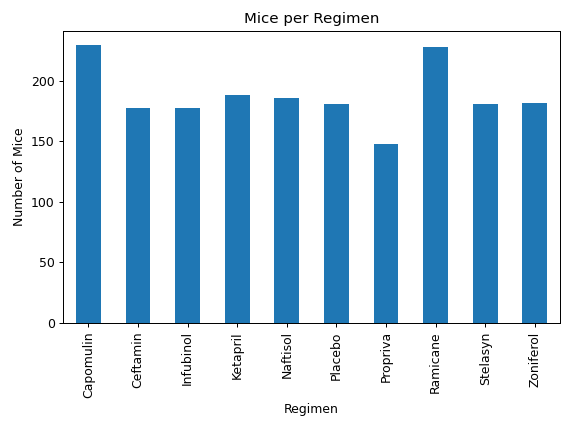

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

drug_regimen = clean_data.groupby("Drug Regimen")

mice_per_drug_regimen = drug_regimen["Mouse ID"].count()
#mice_per_drug_regimen

bar_plot = mice_per_drug_regimen.plot(kind="bar", title = "Mice per Regimen")
bar_plot.set_xlabel("Regimen")
bar_plot.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()


<IPython.core.display.Javascript object>


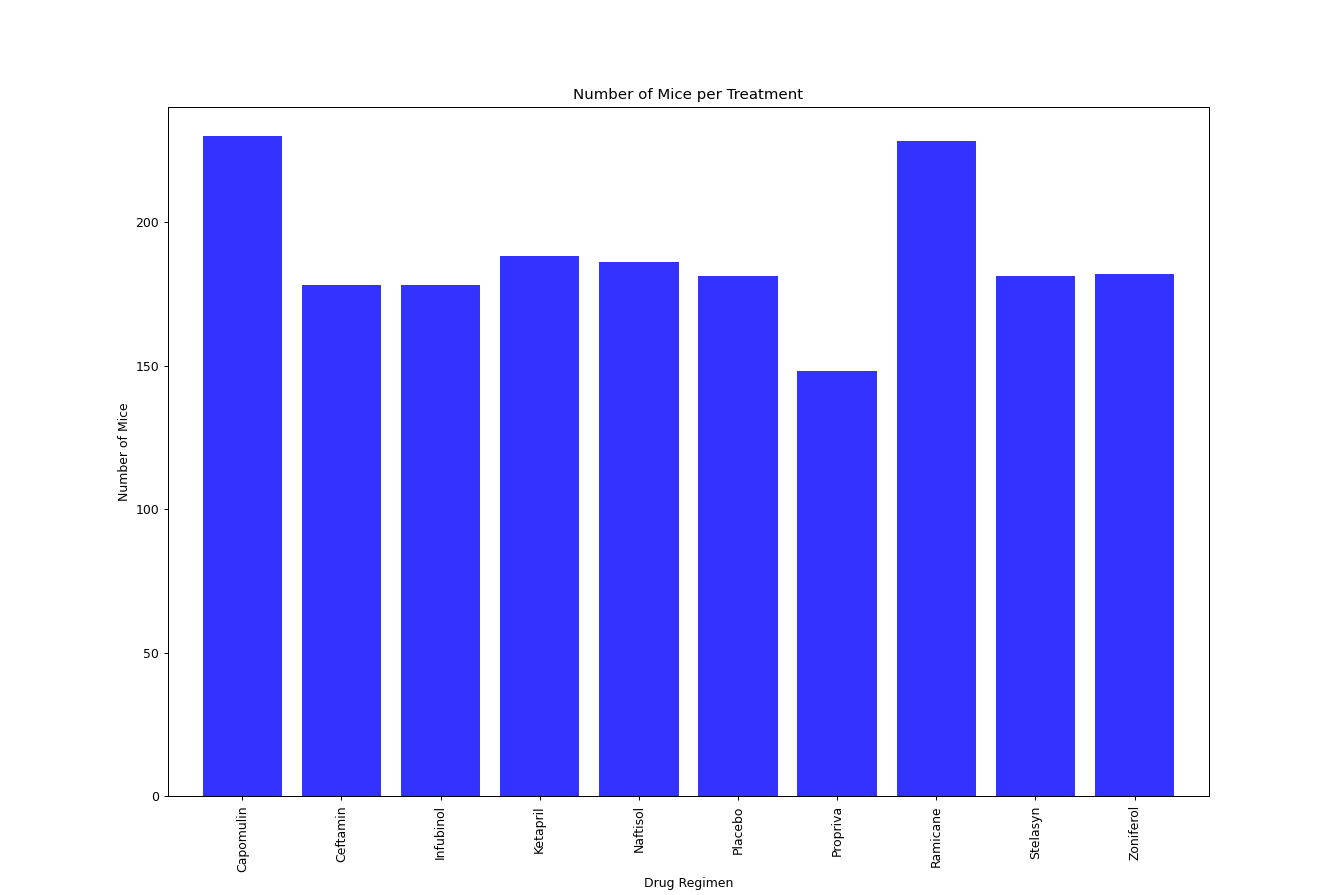

Text(0, 0.5, 'Number of Mice')

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_list =(clean_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
x_axis = np.arange(len(mice_per_drug_regimen))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


<IPython.core.display.Javascript object>


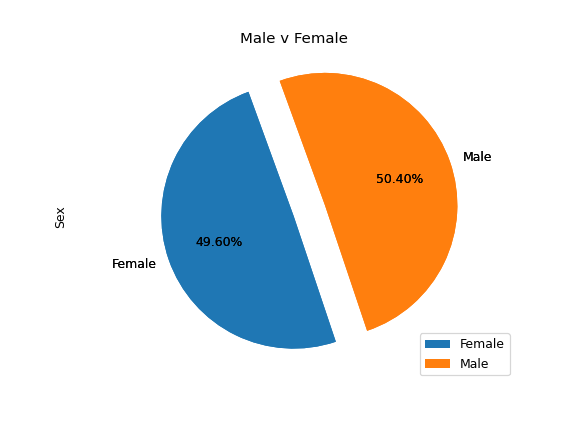

(-1.1443796623575497,
 1.3557290330797118,
 -1.1376588280997215,
 1.1935864459372458)

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = clean_data.groupby(["Mouse ID", "Sex"])
genderdf = pd.DataFrame(gender.size())
sex = pd.DataFrame(genderdf.groupby(["Sex"]).count())
sex.columns = ["Total Count"]
pie_plot = sex.plot.pie(y='Total Count',autopct="%1.2f%%",startangle=110,explode = (0, 0.25))
plt.title("Male v Female")
plt.ylabel("Sex")
plt.axis("equal")

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Label = ["Female", "Male"]
size = [49.60,50.40]

plt.pie(size,labels=Label,autopct="%1.2f%%",startangle=110,explode = (0, 0.25))
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]



In [14]:
# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [15]:
# Ramicane

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [16]:
# Infubinol 

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [17]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")




The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [19]:
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [20]:
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [21]:
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<IPython.core.display.Javascript object>


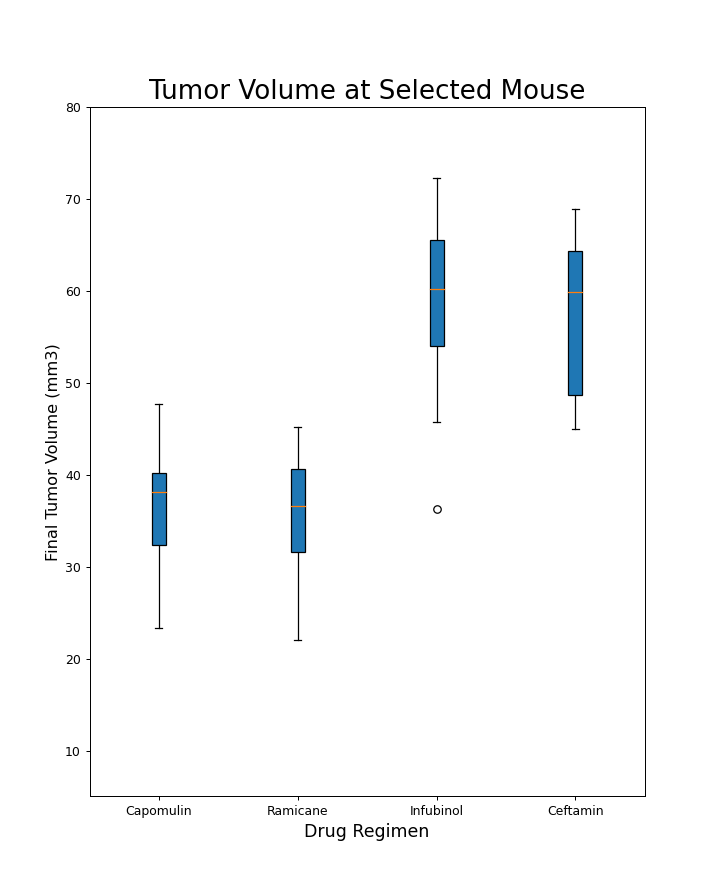

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(8, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =21)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 13)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.1, patch_artist=True,vert=True)

plt.ylim(5, 80)
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


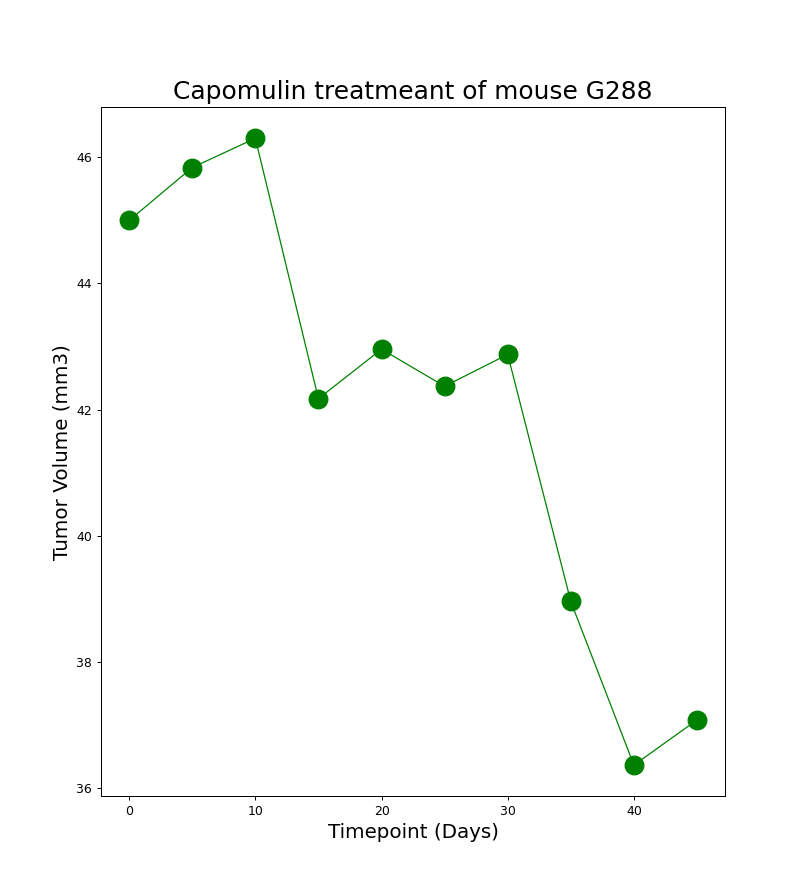

Text(0, 0.5, 'Tumor Volume (mm3)')

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g288",:]
forline_df.head()

x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(9, 10))
plt.title('Capomulin treatmeant of mouse G288',fontsize =20)
plt.plot(x_axis, tumsiz,linewidth=1, markersize=15,marker="o",color="green")
plt.xlabel('Timepoint (Days)',fontsize =16)
plt.ylabel('Tumor Volume (mm3)',fontsize =16)

<IPython.core.display.Javascript object>


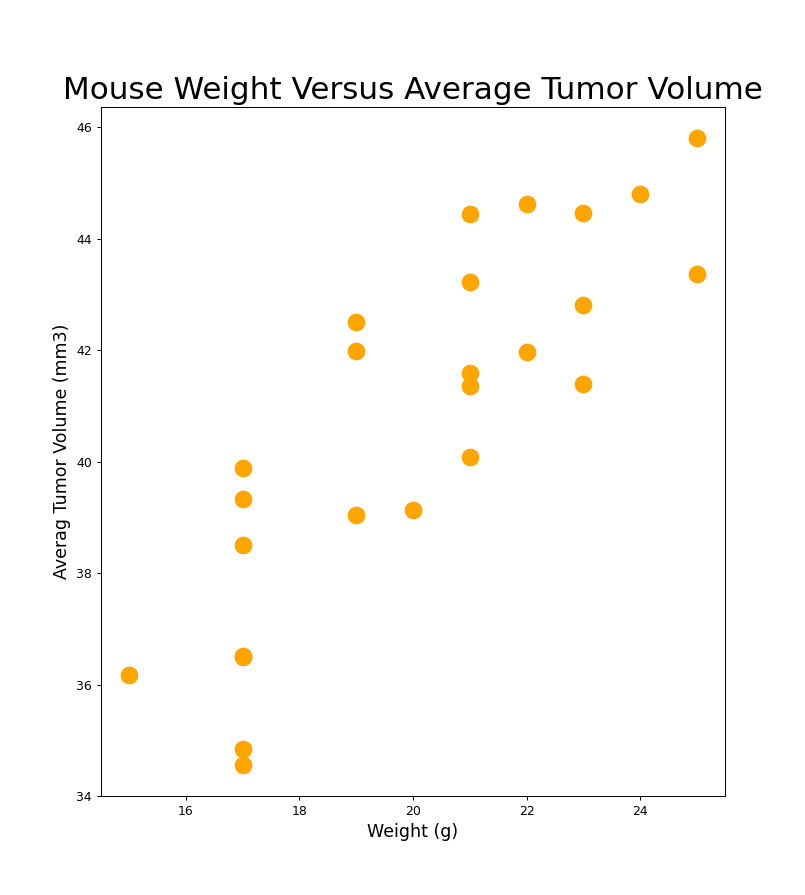

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(9, 10))
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="orange")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [26]:
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [27]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55


<IPython.core.display.Javascript object>


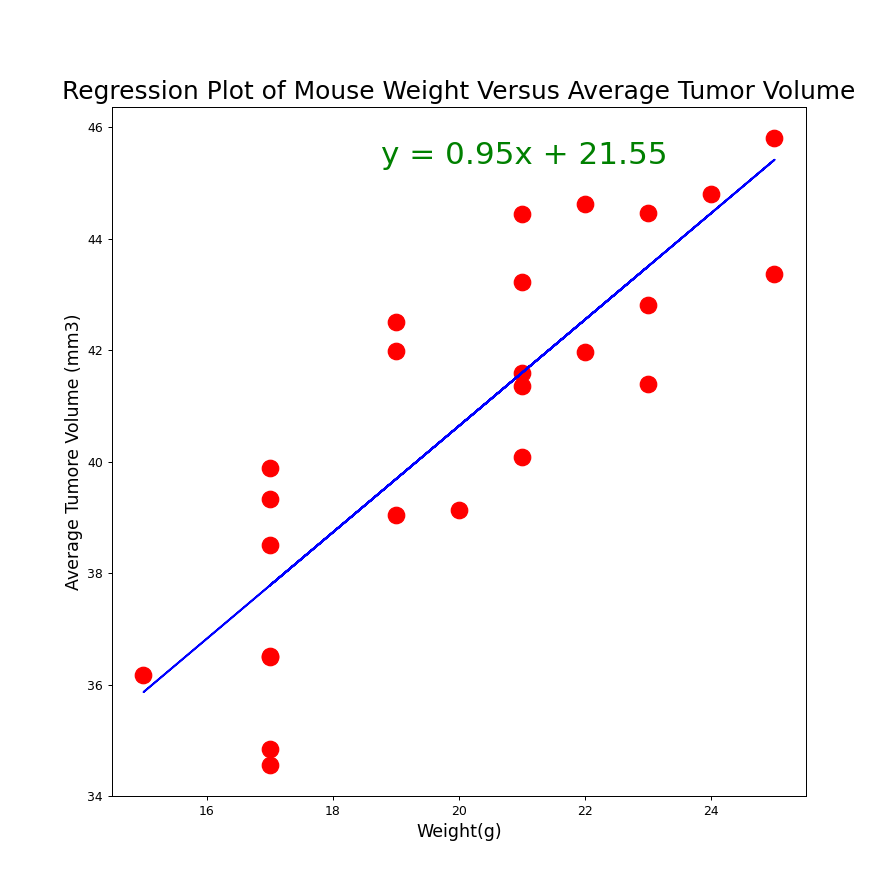

The r-squared is: 0.7088568047708717


In [28]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.scatter(x_values,y_values,s=175, color="red")
plt.plot(x_values,regress_values,"b-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=25,color="green")

print(f"The r-squared is: {rvalue**2}")
plt.show()
